In [2]:
# This code allows for the graphical representation of EEG parameters patterns on a head model.

import os
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import mne
import matplotlib.colors as mcolors


# environment name: explore_cmifoof

# Set paths
main = '/Users/inesseverino/Library/CloudStorage/OneDrive-FondazioneIstitutoItalianoTecnologia/PythonCourse/python-cimec-ines-severino/'
#data_path = os.path.join(main, "data")

# Load both closed and open datasets
closed_df = pd.read_csv(os.path.join(main, 'rs_closed_alpha_amplitude_AllBlocks.csv'))
open_df = pd.read_csv(os.path.join(main, 'rs_open_alpha_amplitude_AllBlocks.csv'))


In [3]:

# Function to plot foof parameters over scalp
from scipy.interpolate import interp1d

def plot_parameters_over_scalp(electrode_values):

    """ Function that given the data array of the electrode parameters plot it over the scalp.

    Input:
    - an array of values (n=128) corresponding to the number of electrodes in the montage

    Output:
    - a plot of parameter over the scalp
    
    
    """

    # Organize the data and deal with NA values
   
    electrode_values = electrode_values.flatten()
    electrode_values[np.isnan(electrode_values)] = 0 
    masked_data = np.ma.masked_invalid(electrode_values)



    # Load EGI 128 channel positions
    montage = mne.channels.make_standard_montage('GSN-HydroCel-129')

    
    # Extract correct electrodes position in 2D coordinates
    pos_dict = montage.get_positions()
    pos =np.array([pos_dict['ch_pos'][ch][:2] for ch in montage.ch_names])

    # Set color mat
    my_cmap = plt.get_cmap('viridis')
    my_cmap = mcolors.ListedColormap(my_cmap(np.arange(my_cmap.N)))
    my_cmap.set_bad(color='black') 
    
    # Plot topomap
    fig, ax = plt.subplots()
    topo, _ = mne.viz.plot_topomap(masked_data,  pos=pos, cmap=my_cmap, axes=ax, show=False)
   
    # Add a color bar
    cbar = plt.colorbar(topo, ax = ax)
    

    plt.show()

    



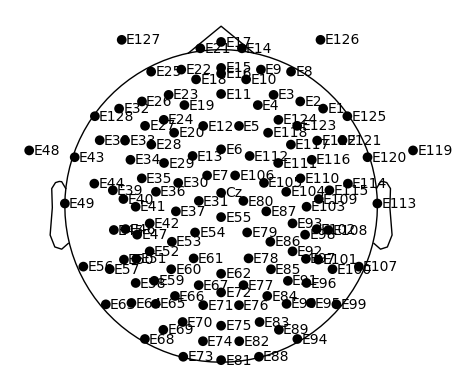

In [4]:
# Plot electrode position over scalp

montage = mne.channels.make_standard_montage('GSN-HydroCel-129')


fig, ax = plt.subplots()
montage.plot(kind='topomap', show_names=True, axes=ax, show=True)
plt.show()

RS BLOCK 1
ASD


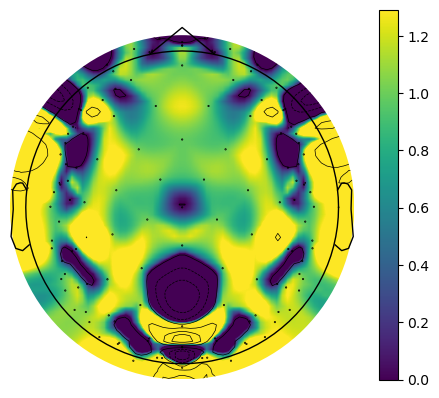

TD


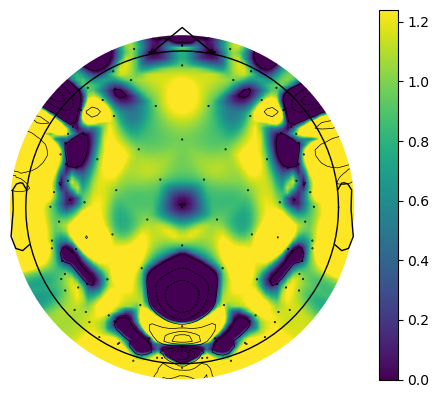

between groups difference


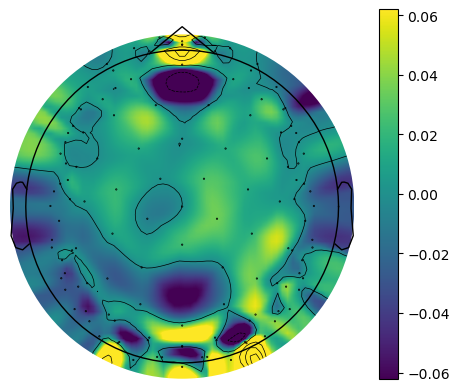

RS BLOCK 2
ASD


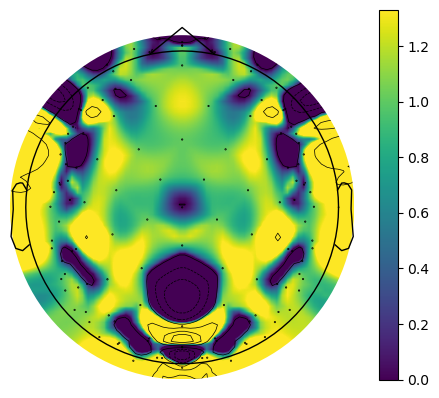

TD


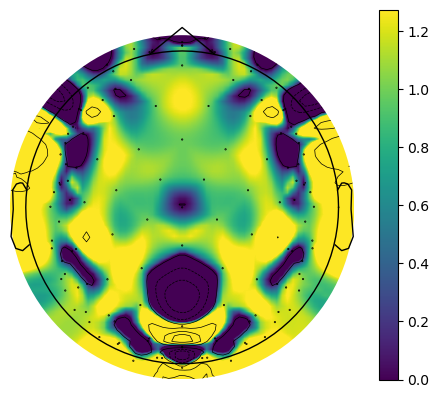

between groups difference


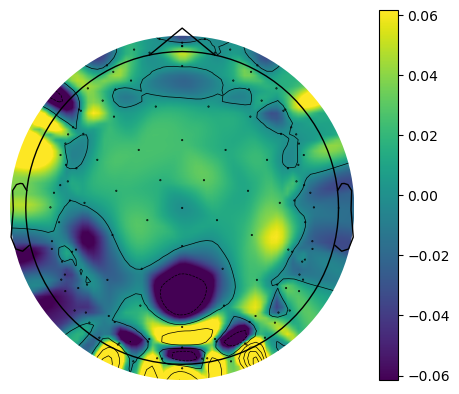

RS BLOCK 3
ASD


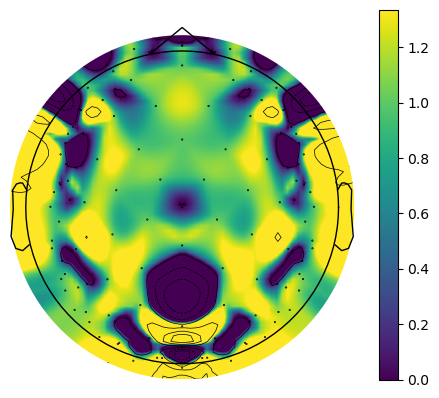

TD


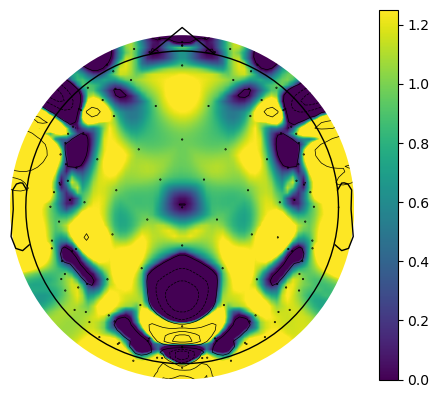

between groups difference


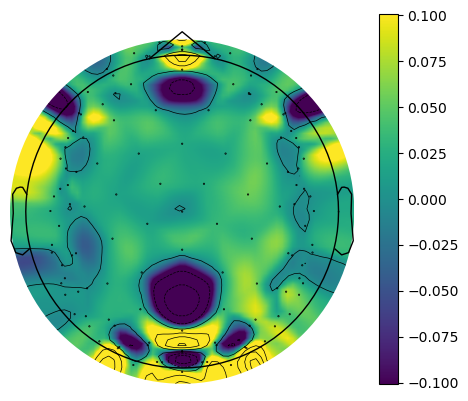

RS BLOCK 4
ASD


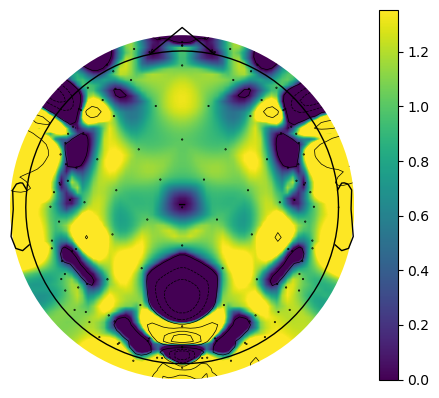

TD


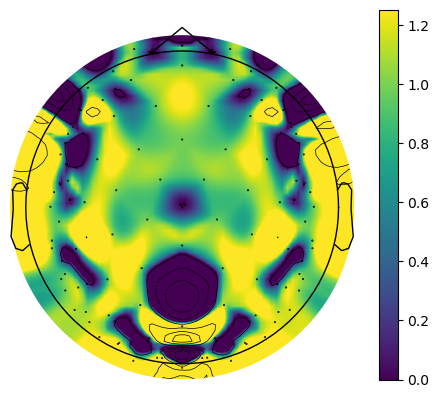

between groups difference


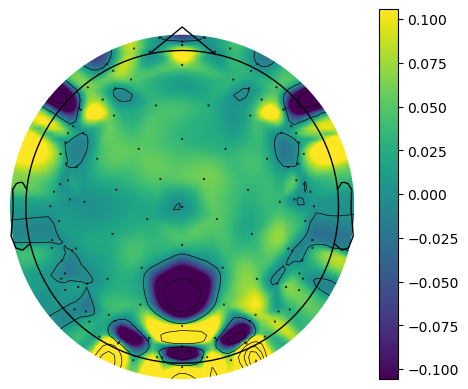

array([       nan, 0.98271226, 0.99791797, 1.00187056, 0.99442749,
       1.01445193, 1.02922464,        nan, 1.00005316,        nan,
       1.03004833, 1.01541031, 1.03427124,        nan, 1.02170989,
       1.02252838,        nan,        nan, 1.02677014, 1.02358773,
              nan, 1.01403483, 1.02722782, 1.02991713,        nan,
       1.00355348, 1.01795415,        nan, 1.0378255 , 1.0286302 ,
       1.01177183,        nan, 0.96078555, 0.99184477, 1.01034771,
       1.01295805, 1.01734926,        nan, 0.89627738, 0.93110442,
       0.96820732, 0.98918115,        nan,        nan, 0.87612254,
       0.92807945,        nan,        nan,        nan, 0.95832997,
       1.03911871, 1.0381576 , 1.04304355, 1.03678762, 0.9969618 ,
              nan, 0.91546916, 1.09981379, 1.17298824, 1.16840301,
       1.13497673, 1.22424881,        nan, 1.02469761, 1.22587922,
       1.27697195, 1.25997795,        nan, 1.07594783, 1.24244129,
       1.29920217, 1.26720346,        nan, 1.08681014, 1.26774

In [5]:
# RS Closed - alpha amplitude

parameter = "alpha_amplitude"


for block in range(1, 5):

    block_df = closed_df[closed_df["rs_block"] == block]
    asd_df = block_df[block_df["diagnosis"] == "ASD"]
    td_df = block_df[block_df["diagnosis"] == "TD"]

    selected_columns = [column for column in asd_df.columns if column.startswith(parameter)]
    average_asd = asd_df[selected_columns].mean().to_numpy()
    average_td = td_df[selected_columns].mean().to_numpy()
    print(f"RS BLOCK {block}")
    print("ASD")
    plot_parameters_over_scalp(average_asd)
    print("TD")
    plot_parameters_over_scalp(average_td)

    print("between groups difference")
    diff_data = average_asd - average_td
    plot_parameters_over_scalp(diff_data)


average_asd

RS BLOCK 1
ASD


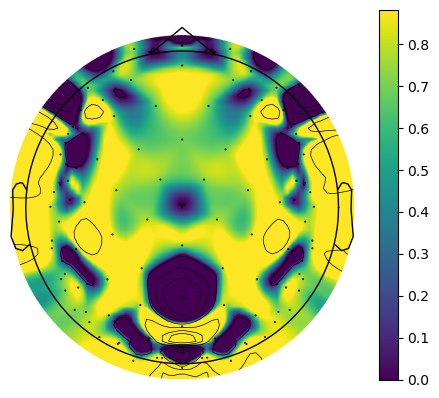

TD


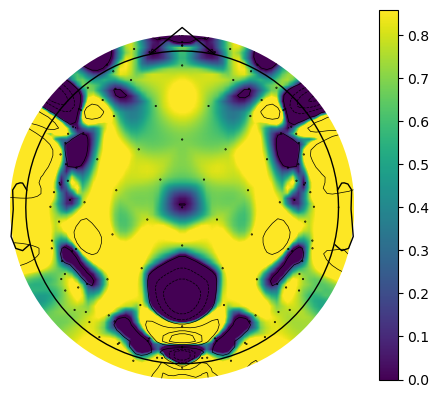

between groups difference


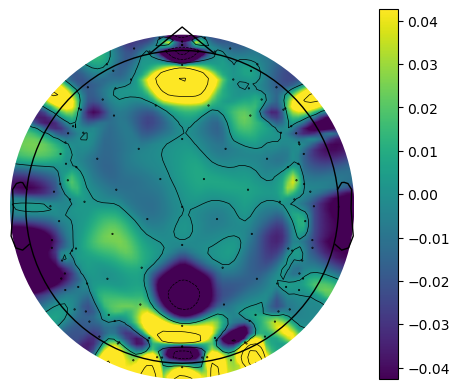

RS BLOCK 2
ASD


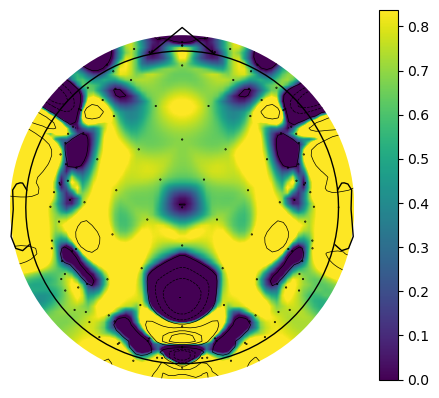

TD


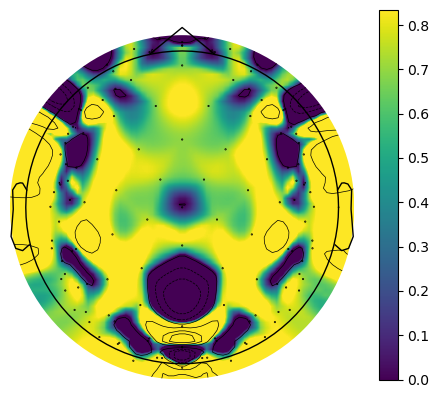

between groups difference


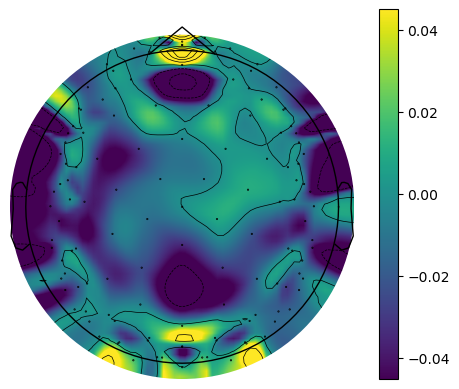

RS BLOCK 3
ASD


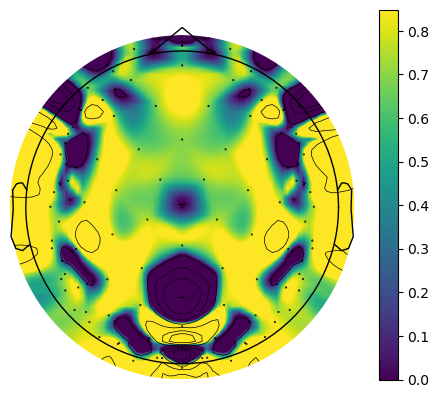

TD


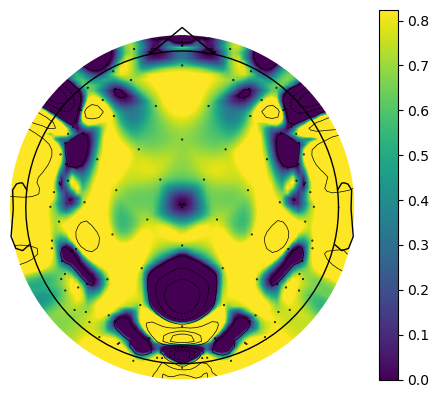

between groups difference


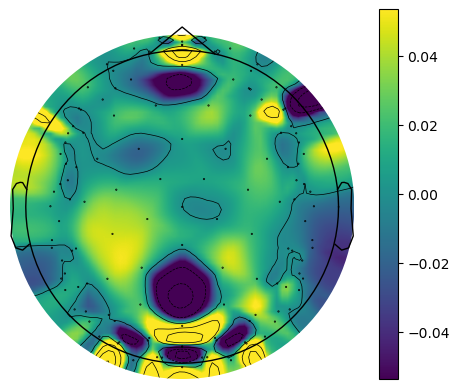

RS BLOCK 4
ASD


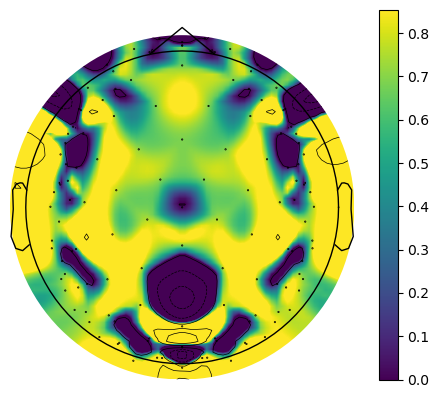

TD


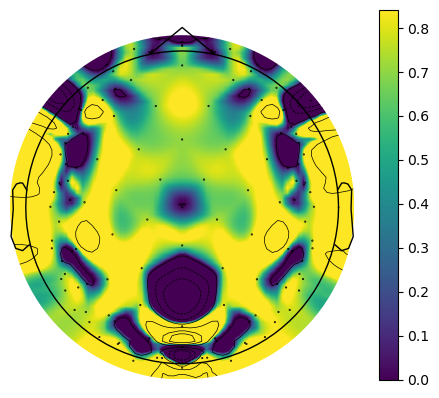

between groups difference


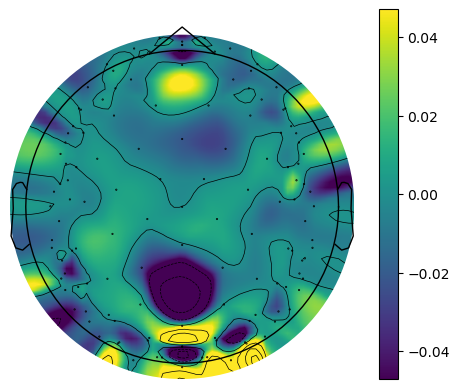

RS BLOCK 5
ASD


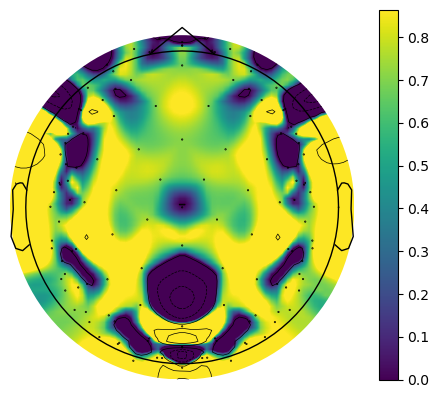

TD


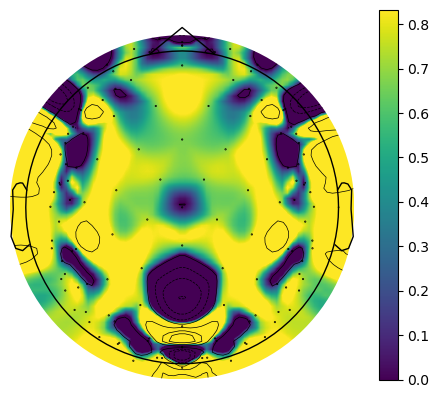

between groups difference


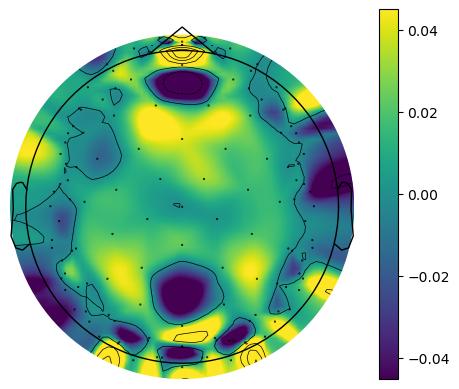

In [6]:
# RS Closed - alpha amplitude

parameter = "alpha_amplitude"


for block in range(1, 6):

    block_df = open_df[open_df["rs_block"] == block]
    asd_df = block_df[block_df["diagnosis"] == "ASD"]
    td_df = block_df[block_df["diagnosis"] == "TD"]

    selected_columns = [column for column in asd_df.columns if column.startswith(parameter)]
    average_asd = asd_df[selected_columns].mean().to_numpy()
    average_td = td_df[selected_columns].mean().to_numpy()
    print(f"RS BLOCK {block}")
    print("ASD")
    plot_parameters_over_scalp(average_asd)
    print("TD")
    plot_parameters_over_scalp(average_td)

    print("between groups difference")
    diff_data = average_asd - average_td
    #diff_data = average_td - average_asd
    plot_parameters_over_scalp(diff_data)

RS BLOCK 1
ASD


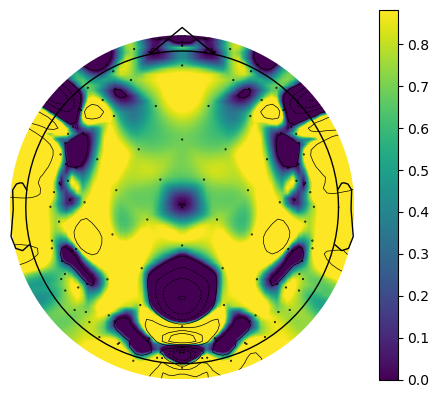

TD


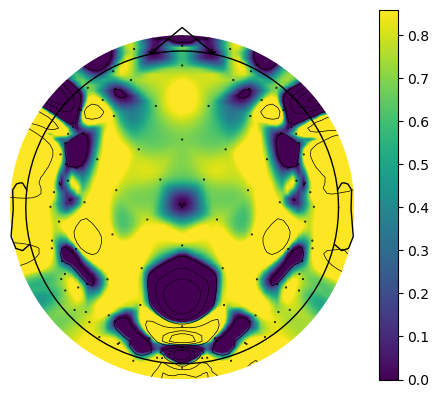

between groups difference


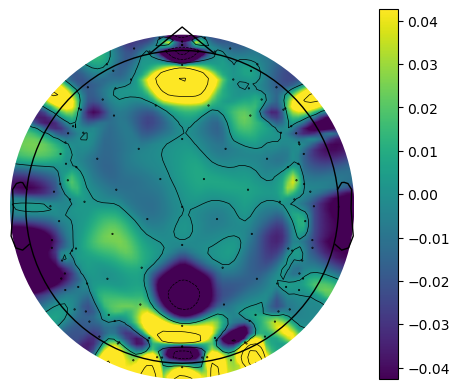

RS BLOCK 2
ASD


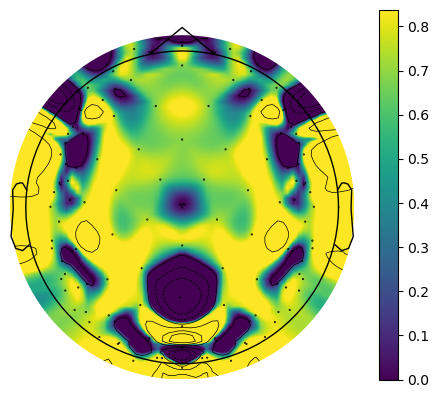

TD


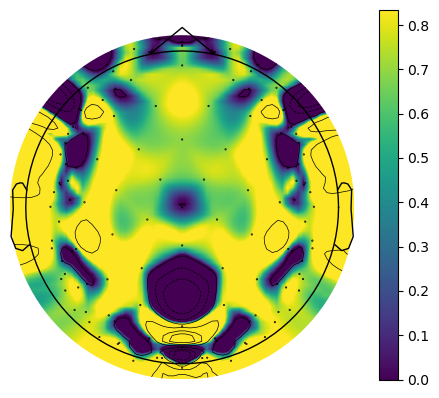

between groups difference


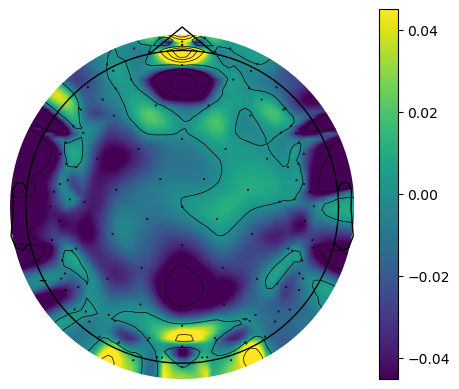

RS BLOCK 3
ASD


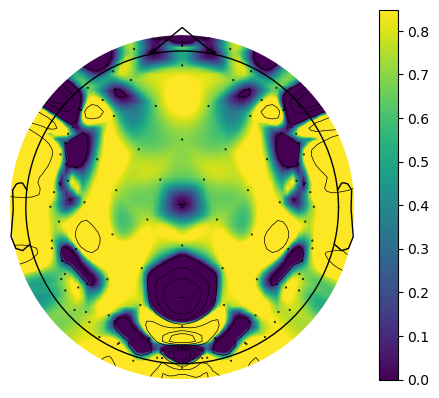

TD


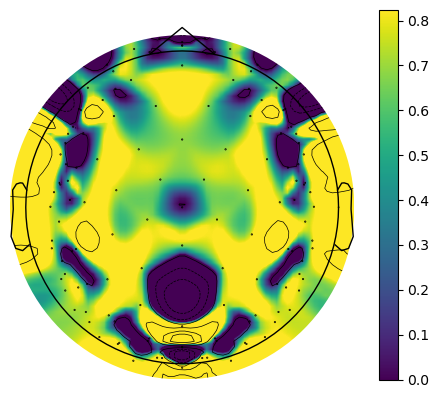

between groups difference


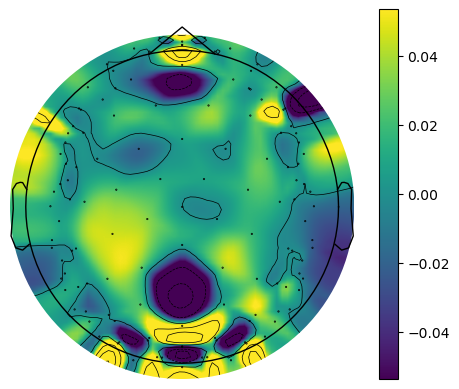

RS BLOCK 4
ASD


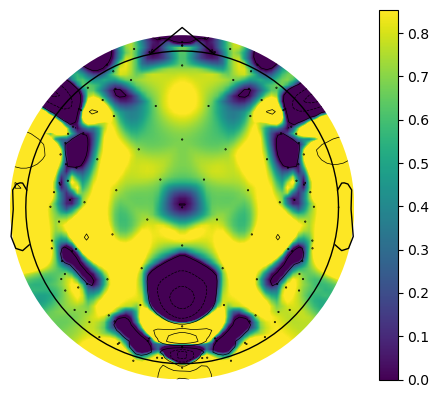

TD


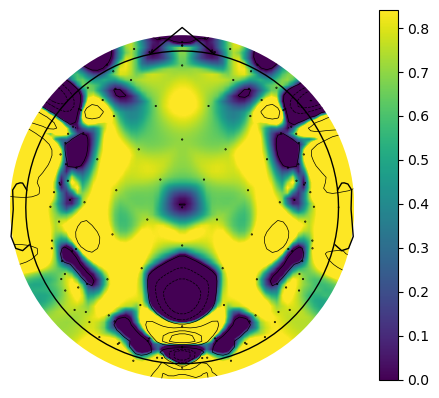

between groups difference


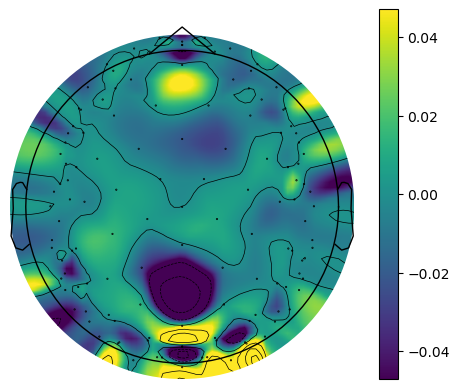

RS BLOCK 5
ASD


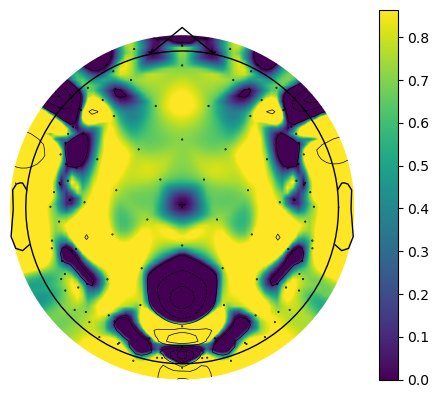

TD


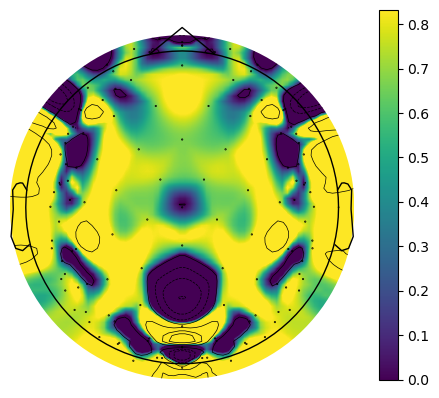

between groups difference


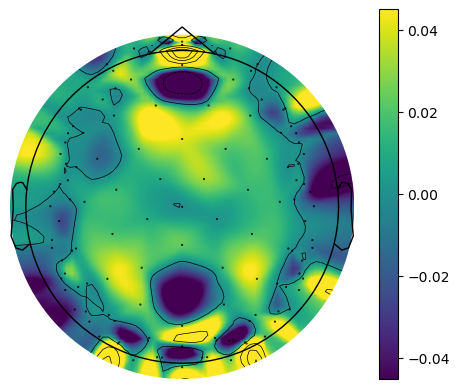

In [8]:
# RS Open - alpha amplitude

parameter = "alpha_amplitude"


for block in range(1, 6):

    block_df = open_df[open_df["rs_block"] == block]
    asd_df = block_df[block_df["diagnosis"] == "ASD"]
    td_df = block_df[block_df["diagnosis"] == "TD"]

    selected_columns = [column for column in asd_df.columns if column.startswith(parameter)]
    average_asd = asd_df[selected_columns].mean().to_numpy()
    average_td = td_df[selected_columns].mean().to_numpy()
    print(f"RS BLOCK {block}")
    print("ASD")
    plot_parameters_over_scalp(average_asd)
    print("TD")
    plot_parameters_over_scalp(average_td)

    print("between groups difference")
    diff_data = average_asd - average_td
    #diff_data = average_td - average_asd
    plot_parameters_over_scalp(diff_data)

RS BLOCK 1
between groups difference


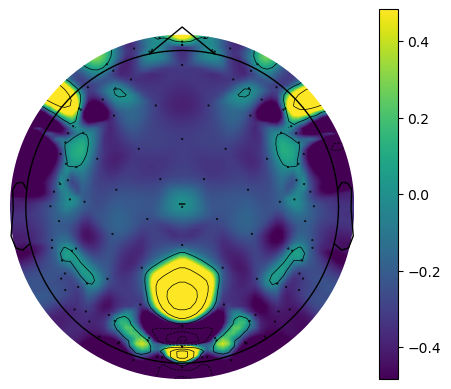

RS BLOCK 2
between groups difference


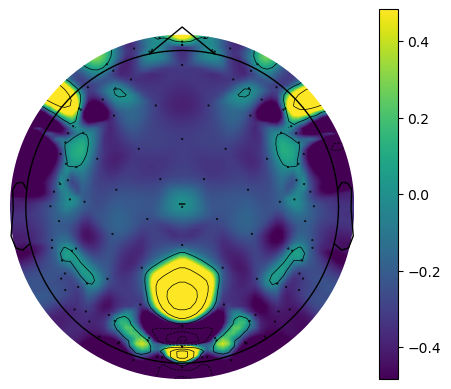

RS BLOCK 3
between groups difference


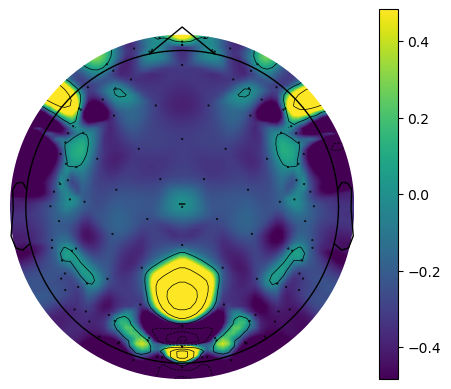

RS BLOCK 4
between groups difference


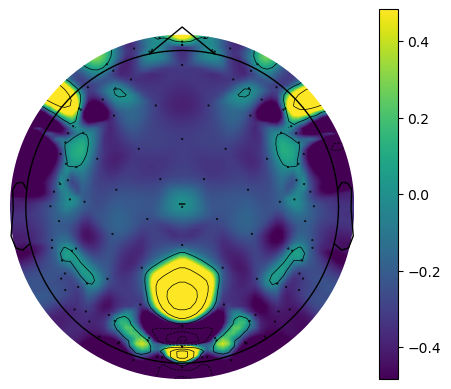

RS BLOCK 5
between groups difference


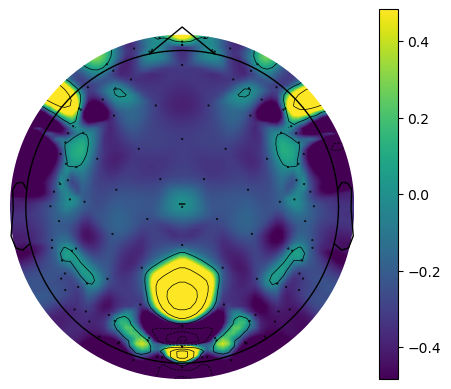

In [12]:
# ASD: RS closed - open

parameter = "alpha_amplitude"


for block in range(1, 6):

    asd_open_df = open_df[open_df["diagnosis"] == "ASD"]
    asd_closed_df = closed_df[closed_df["diagnosis"] == "ASD"]
   

    selected_columns = [column for column in asd_open_df.columns if column.startswith(parameter)]
    average_asd_open = asd_open_df[selected_columns].mean().to_numpy()
    average_asd_closed = asd_closed_df[selected_columns].mean().to_numpy()
    print(f"RS BLOCK {block}")
    print("between groups difference")
    diff_data = average_asd_open - average_asd_closed
    plot_parameters_over_scalp(diff_data)

RS BLOCK 1
between groups difference


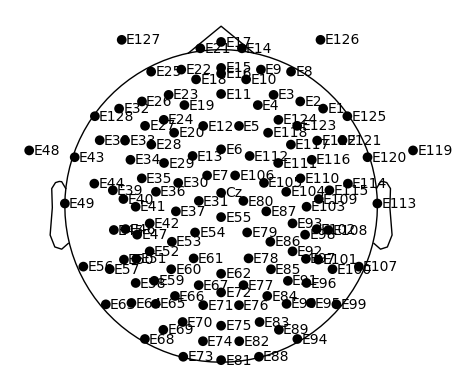

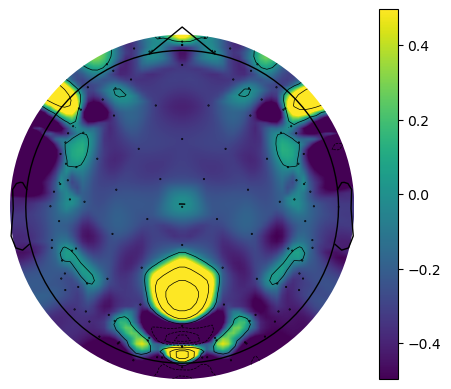

RS BLOCK 2
between groups difference


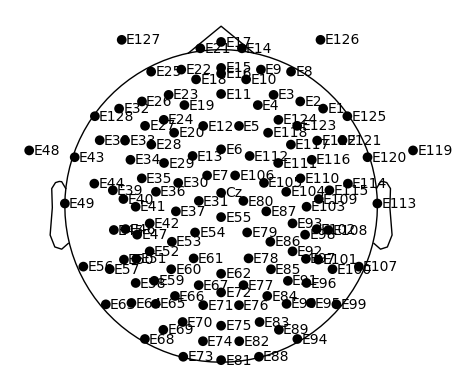

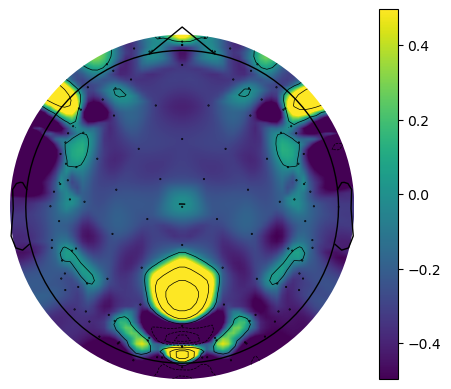

RS BLOCK 3
between groups difference


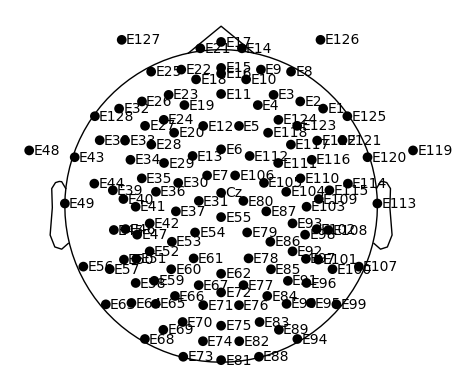

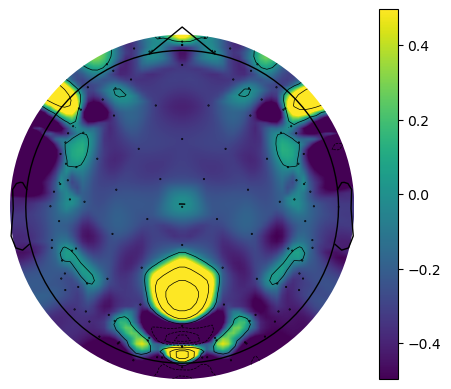

RS BLOCK 4
between groups difference


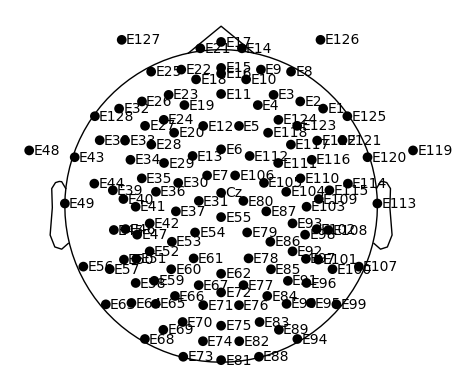

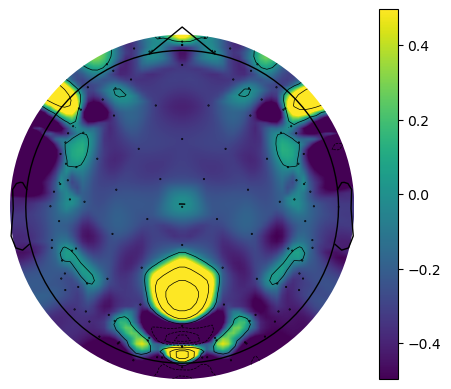

RS BLOCK 5
between groups difference


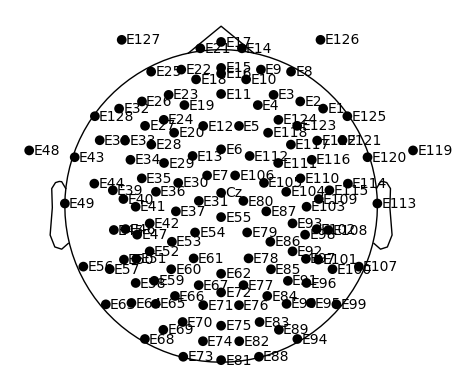

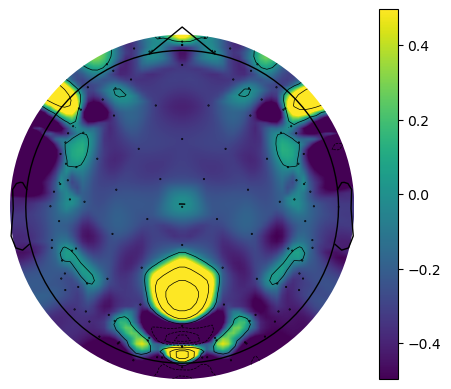

In [8]:
# TD: RS closed - open

parameter = "alpha_amplitude"


for block in range(1, 6):

    td_open_df = open_df[open_df["diagnosis"] == "TD"]
    td_closed_df = closed_df[closed_df["diagnosis"] == "ASD"]
   

    selected_columns = [column for column in asd_open_df.columns if column.startswith(parameter)]
    average_td_open = td_open_df[selected_columns].mean().to_numpy()
    average_td_closed = td_closed_df[selected_columns].mean().to_numpy()
    print(f"RS BLOCK {block}")
    print("between groups difference")
    diff_data = average_td_open - average_td_closed
    plot_parameters_over_scalp(diff_data)